Text(0.5, 1.0, 'Posterior distribution')

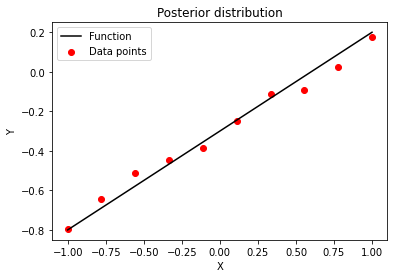

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
from scipy.stats import multivariate_normal
from numpy.linalg import inv

#4.Plotting graph for the 10 sample posterior distribution

def generate_10_points_with_gausian_noise(w0,w1):
    x_coordinates=np.linspace(start=-1,stop=1,num=10)
    y_coordinates=[]
    for x in x_coordinates:
        gaussian_error=np.random.normal(0,0.04)
        y=w0+w1*x+gaussian_error
        y_coordinates.append(y)
    return x_coordinates,y_coordinates
def generate_10_points(w0,w1):
    x_coordinates=np.linspace(start=-1,stop=1,num=10)
    y_coordinates=[]
    for x in x_coordinates:
        y=w0+w1*x
        y_coordinates.append(y)
    return x_coordinates,y_coordinates

x,y=generate_10_points_with_gausian_noise(-0.3,0.5)
x_true,y_true=generate_10_points(-0.3,0.5)

plt.scatter(x,y,color='red',label='Data points')
plt.plot(x_true,y_true,color='black',label='Function')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Posterior distribution")

Text(0.5, 1.0, 'Bayesian_Regression')

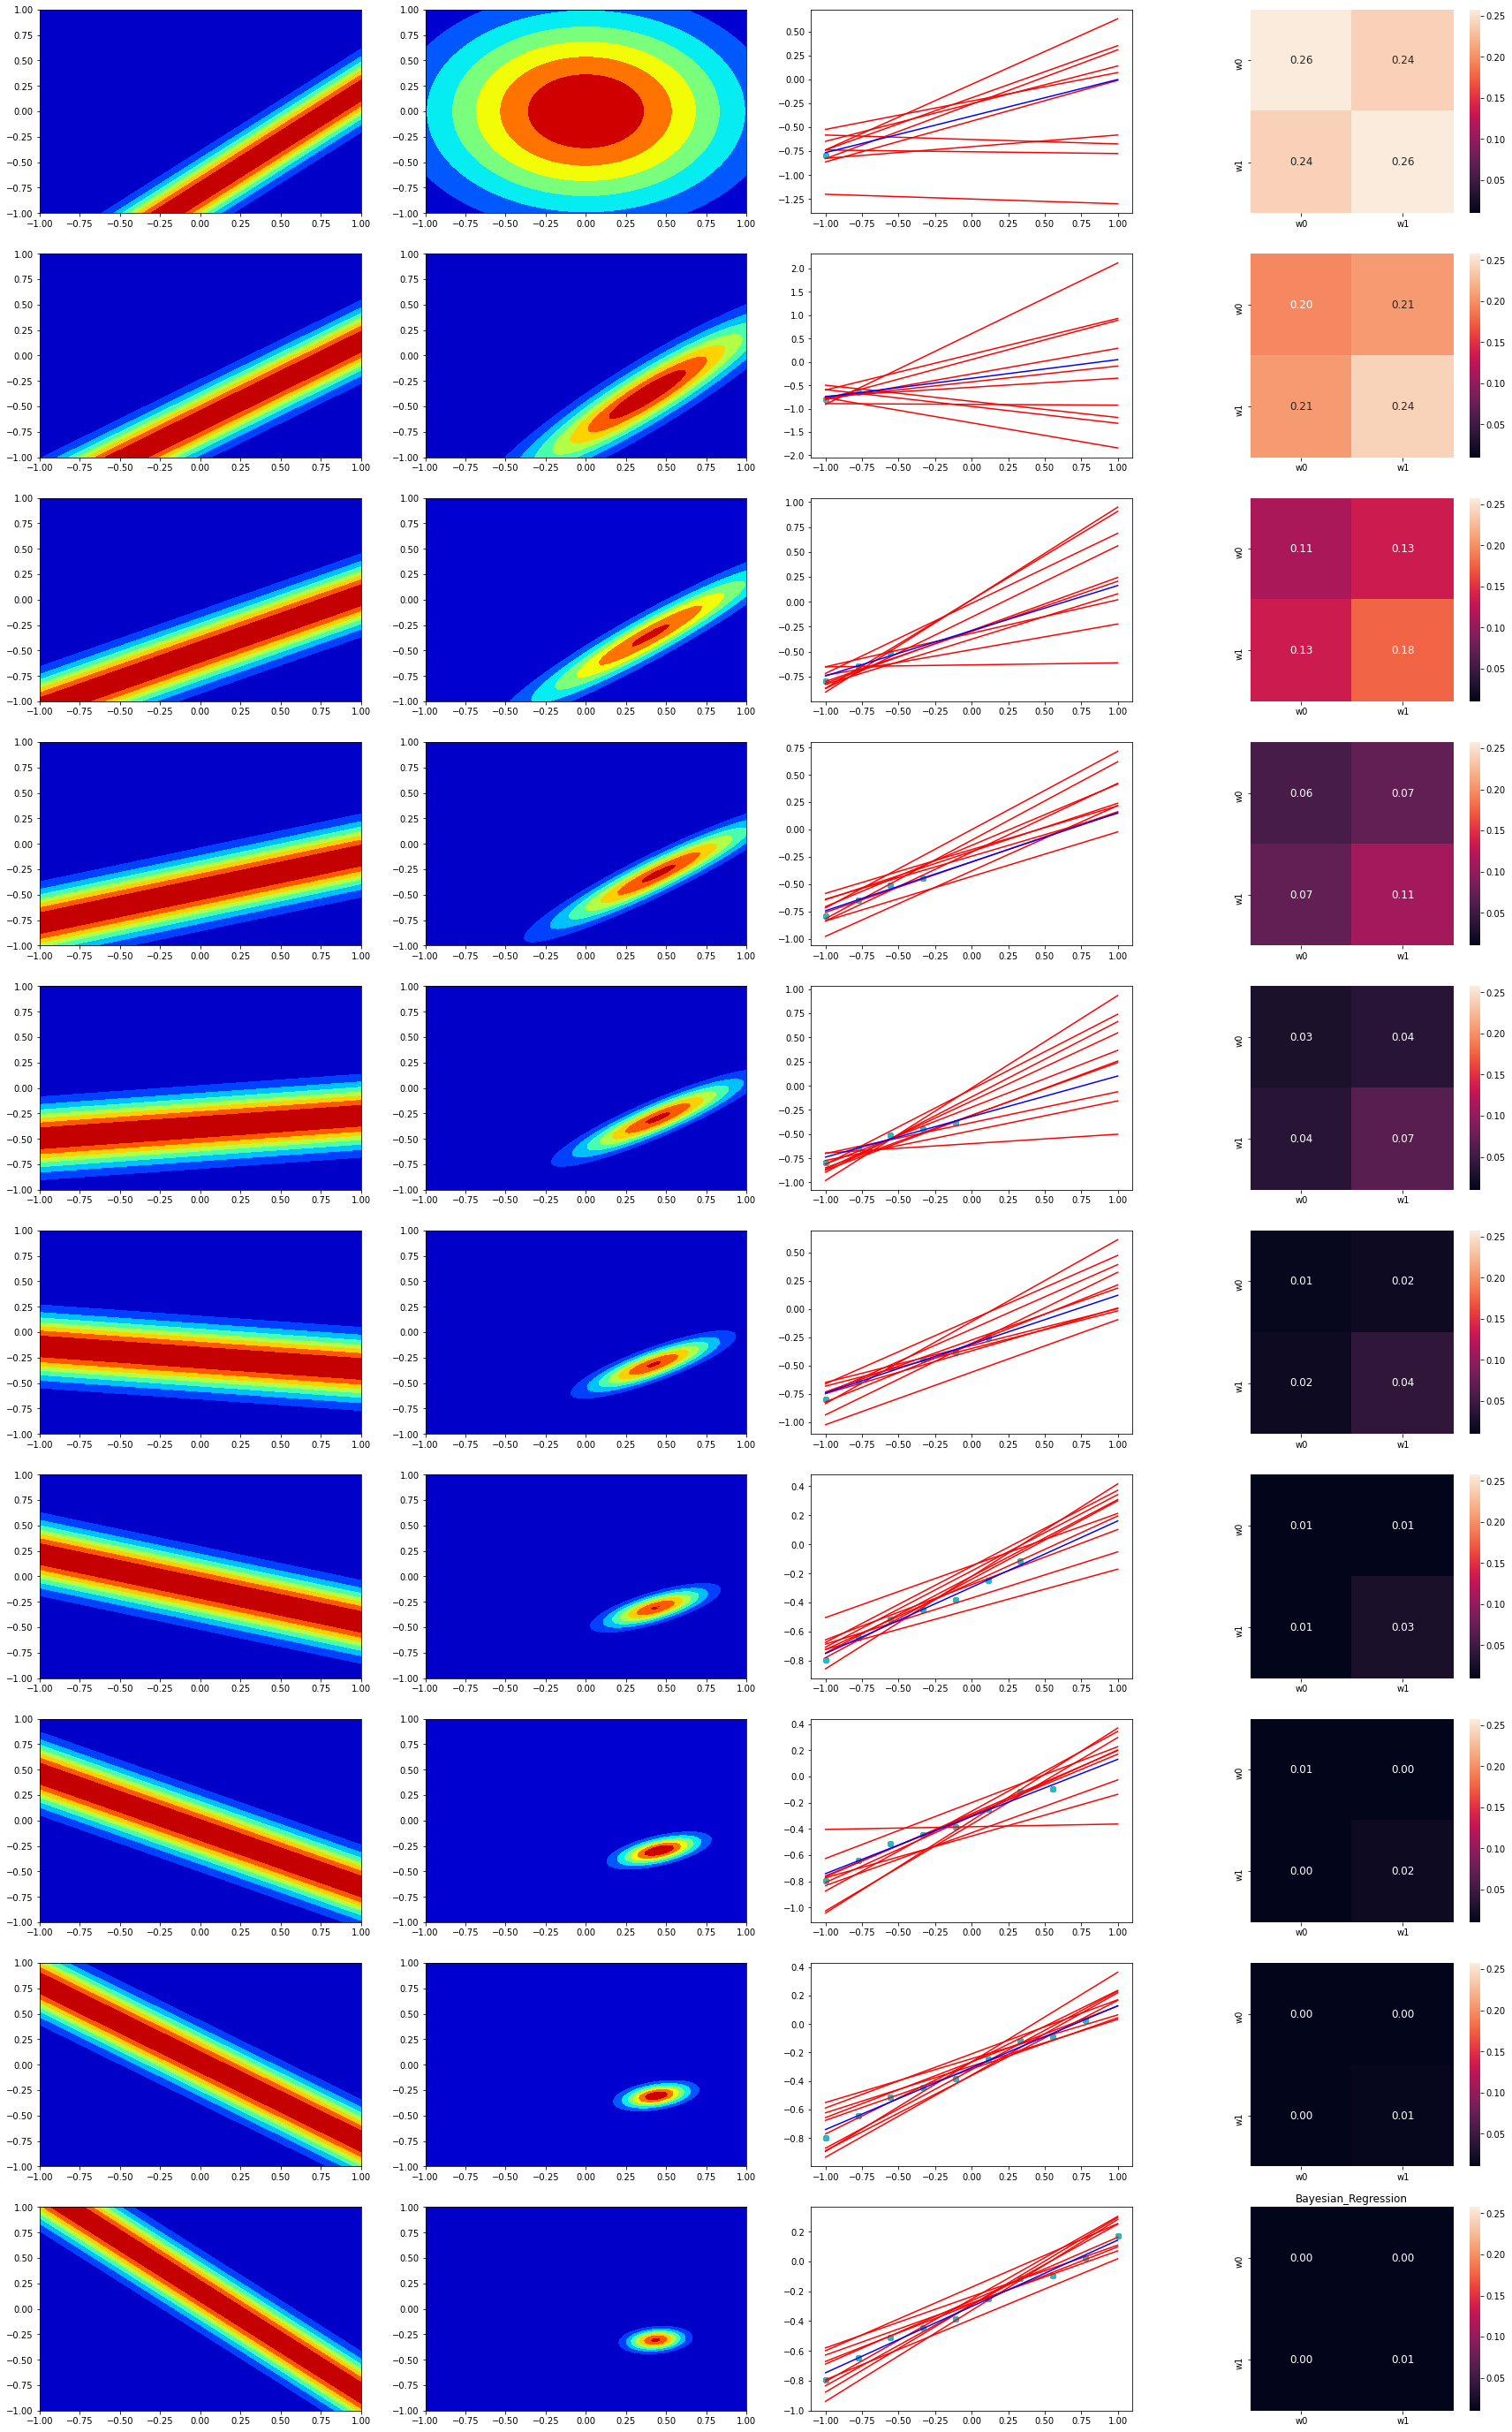

In [6]:
#Bayesian_Regression
m0=np.array([0,0])
s0=[[0.5,0],[0,0.5]]
prior_grid=prior_grid_calc(w0_values,w1_values,0,0.5)
prior_grid
count=0
x_points=np.linspace(-1,1,10)
fig,axs= plt.subplots(10,4,figsize=(30,50))
for i in range(len(x)):
    x_sub=[x[i]]
    y_sub=[y[i]]
    x_total=x[:i+1]
    y_total=y[:i+1]
    phi =[1,x[i]]
    likelihood_grid=likelihood_grid_calc(w0_values,w1_values,x_sub,y_sub)
    posterior_grid=posterior_grid_calc(prior_grid,likelihood_grid)
    w0,w1,mn,sn=pick_10_lines(m0,s0,25,phi,y_sub)
    # Plotted likelihood grid  
    axs[count,0].contourf(w0_values,w1_values,likelihood_grid,cmap="jet")
    # Plotted prior grid 
    axs[count,1].contourf(w0_values,w1_values,prior_grid,cmap="jet")
    # Plotted 10 points(w0,w1) from Posterior distribution  
    for i in range(len(w0)):
        axs[count,2].plot(x_points,w0[i]+w1[i]*x_points,color="red")
        axs[count,2].scatter(x_total,y_total)
    # Plotted the mean point(w0,w1) of posterior distribution    
    axs[count,2].plot(x_points,mn[0]+mn[1]*x_points,color="blue")
    # Plotted the covariance matrix
    sns.heatmap(sn,
                    cbar=True,
                    annot=True,
                    square=True,
                    robust=True,
                    vmin = 0.010,
                    vmax = 0.2575,
                    fmt='.2f',
                    annot_kws={'size': 12},
                    yticklabels=['w0','w1'],
                    xticklabels=['w0','w1'],
                    ax=axs[count,3],
               )
    m0=mn
    s0=sn
    prior_grid=posterior_grid
    count+=1

plt.title("Bayesian_Regression")